## Exploration

In [26]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv("data/Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.shape

(10999, 12)

In [4]:
df.isna().sum().to_frame()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


In [5]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


array([[<Axes: title={'center': 'Cost_of_the_Product'}>]], dtype=object)

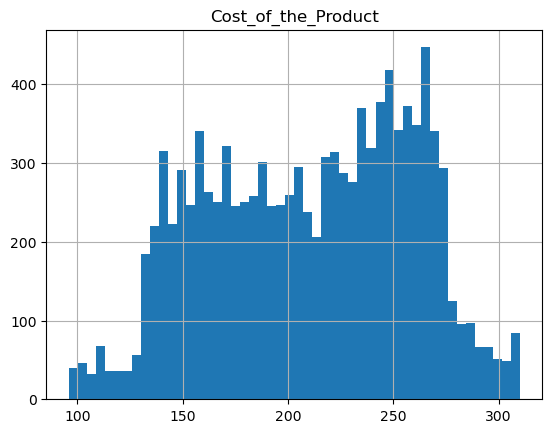

In [10]:
df.hist("Cost_of_the_Product", bins=50)

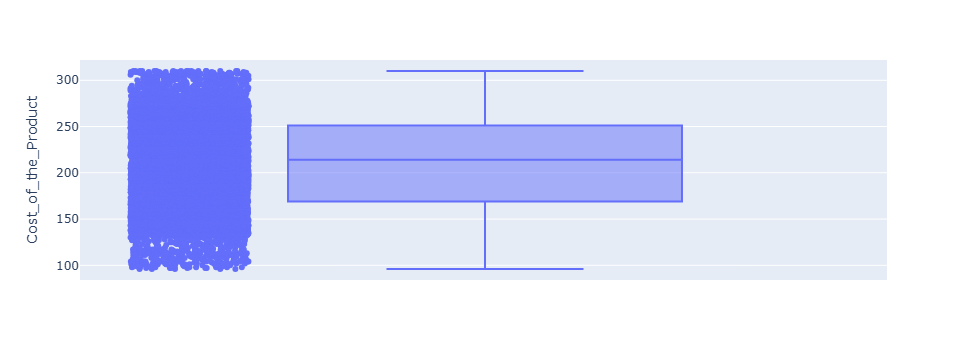

In [28]:
fig = px.box(df, y="Cost_of_the_Product", points="all")
fig.show()

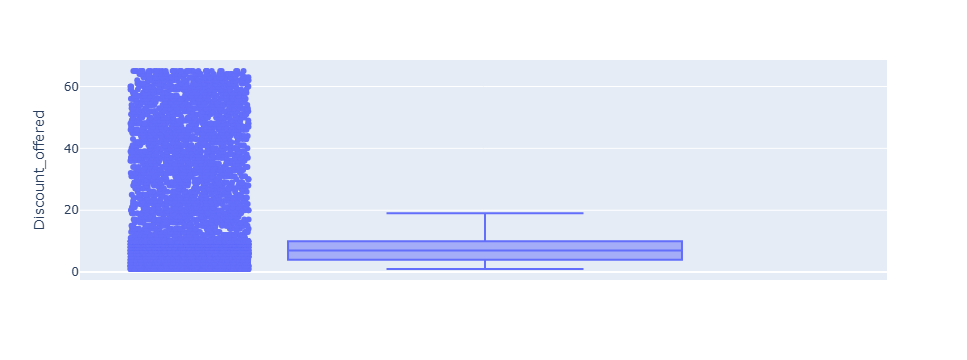

In [29]:
fig = px.box(df, y="Discount_offered", points="all")
fig.show()

In [32]:
df[df["Discount_offered"]> 60].shape

(234, 12)

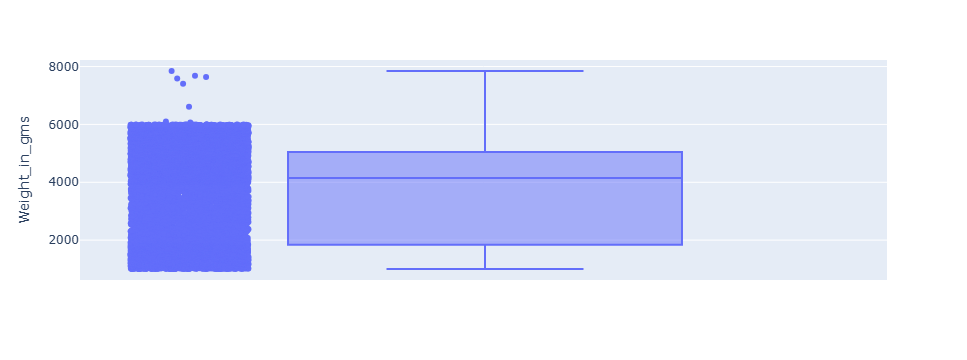

In [33]:
fig = px.box(df, y="Weight_in_gms", points="all")
fig.show()

In [34]:
df[df["Weight_in_gms"] > 6000]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
198,199,D,Ship,2,3,142,3,medium,F,38,7640,1
199,200,F,Ship,2,2,154,3,medium,M,38,7846,1
205,206,F,Ship,2,3,145,3,medium,F,24,7588,1
213,214,B,Ship,2,5,160,3,medium,F,31,7401,1
244,245,C,Ship,2,1,142,3,medium,F,8,6064,1
245,246,F,Ship,2,4,154,3,medium,F,48,7684,1
251,252,F,Road,2,2,145,3,medium,F,5,6102,1
257,258,F,Road,2,2,129,3,medium,F,22,6614,1


In [13]:
df.groupby("Reached.on.Time_Y.N").count()[["ID"]]

,ID
Reached.on.Time_Y.N,
0,4436
1,6563


In [ ]:
# 0 = Reached on time
# 1 = Not reached on time

In [17]:
df["Mode_of_Shipment"].value_counts().to_frame()

,count
Mode_of_Shipment,
Ship,7462
Flight,1777
Road,1760


In [18]:
df["Gender"].value_counts().to_frame()

,count
Gender,
F,5545
M,5454


In [19]:
df["Product_importance"].value_counts().to_frame()

,count
Product_importance,
low,5297
medium,4754
high,948


In [36]:
df["Warehouse_block"].value_counts().to_frame()

,count
Warehouse_block,
F,3666
D,1834
A,1833
B,1833
C,1833


## Observations
- **Outliers** : very few columns has presence of outliers,  since our data is close to 11k we are not removing outliers.
- **Scaling** of data is required since data is more divercified across various ranges
- For Gender and Product_importance we can do **Ordinal Encoding** and for Mode_of_Shipment, Warehouse_block we can do **One Hot Encoding**.
- Since Its classification Random Forest will gives us feature importance with accuracy which in this case is the best but for accuracy comparision we can also see how NN performs.
- Optional : Since We have Scaling and Encoding we can use Pipeline.